In [4]:
pip install 'git+https://github.com/facebookresearch/detectron2.git'

  Cloning https://github.com/facebookresearch/detectron2.git to /tmp/pip-req-build-82w0exui
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/detectron2.git /tmp/pip-req-build-82w0exui
  Resolved https://github.com/facebookresearch/detectron2.git to commit 8d85329aed8506ea3672e3e208971345973ea761
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 2.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.2/79.2 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 7.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.5/154.5 kB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 427.8/427.8 kB 18.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 59.

In [5]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import json
import os
import random
import cv2
import detectron2
from detectron2.engine import DefaultTrainer
from detectron2.config import get_cfg
from detectron2.data.datasets import register_coco_instances
from detectron2.data import MetadataCatalog, build_detection_train_loader
from detectron2.utils.visualizer import Visualizer
from detectron2 import model_zoo
import pycocotools
from detectron2.structures import BoxMode
from detectron2.data import MetadataCatalog, DatasetCatalog
from detectron2.engine import DefaultTrainer
from detectron2.engine import DefaultPredictor
from detectron2.utils.visualizer import ColorMode
from detectron2.evaluation import COCOEvaluator, inference_on_dataset
from detectron2.data import build_detection_test_loader
from detectron2.engine import DefaultTrainer, DefaultPredictor
from detectron2.evaluation import COCOEvaluator, inference_on_dataset
from detectron2.utils.visualizer import Visualizer, ColorMode

### Data Preprocessing

In [6]:
#Training dataset
train_df=pd.read_csv('/kaggle/input/imaterialist-fashion-2020-fgvc7/train.csv')
train_df.head()

,ImageId,EncodedPixels,Height,Width,ClassId,AttributesIds
0,00000663ed1ff0c4e0132b9b9ac53f6e,6068157 7 6073371 20 6078584 34 6083797 48 608...,5214,3676,6,"115,136,143,154,230,295,316,317"
1,00000663ed1ff0c4e0132b9b9ac53f6e,6323163 11 6328356 32 6333549 53 6338742 75 63...,5214,3676,0,"115,136,142,146,225,295,316,317"
2,00000663ed1ff0c4e0132b9b9ac53f6e,8521389 10 8526585 30 8531789 42 8537002 46 85...,5214,3676,28,163
3,00000663ed1ff0c4e0132b9b9ac53f6e,12903854 2 12909064 7 12914275 10 12919485 15 ...,5214,3676,31,"160,204"
4,00000663ed1ff0c4e0132b9b9ac53f6e,10837337 5 10842542 14 10847746 24 10852951 33...,5214,3676,32,219


In [7]:
#Get label file
with open('/kaggle/input/imaterialist-fashion-2020-fgvc7/label_descriptions.json','r') as file:
    label_d=json.load(file)

print("Label description columns {}".format(list(label_d.keys())))

Label description columns ['categories', 'attributes']


In [8]:
#Separate label description into categories and attributes
categories_df=pd.DataFrame(label_d['categories'])
attributes_df=pd.DataFrame(label_d['attributes'])
categories_df

,id,name,supercategory,level
0,0,"shirt, blouse",upperbody,2
1,1,"top, t-shirt, sweatshirt",upperbody,2
2,2,sweater,upperbody,2
3,3,cardigan,upperbody,2
4,4,jacket,upperbody,2
5,5,vest,upperbody,2
6,6,pants,lowerbody,2
7,7,shorts,lowerbody,2
8,8,skirt,lowerbody,2
9,9,coat,wholebody,2


In [9]:
categ_names=categories_df["name"].unique()
print(categ_names)
print(f"Number of attributes {len(categ_names)}")

['shirt, blouse' 'top, t-shirt, sweatshirt' 'sweater' 'cardigan' 'jacket'
 'vest' 'pants' 'shorts' 'skirt' 'coat' 'dress' 'jumpsuit' 'cape'
 'glasses' 'hat' 'headband, head covering, hair accessory' 'tie' 'glove'
 'watch' 'belt' 'leg warmer' 'tights, stockings' 'sock' 'shoe'
 'bag, wallet' 'scarf' 'umbrella' 'hood' 'collar' 'lapel' 'epaulette'
 'sleeve' 'pocket' 'neckline' 'buckle' 'zipper' 'applique' 'bead' 'bow'
 'flower' 'fringe' 'ribbon' 'rivet' 'ruffle' 'sequin' 'tassel']
Number of attributes 46


In [10]:
#Create dictionaries to map the IDs with the category and attributes strings
cat_map={category["id"]: category["name"] for category in label_d['categories']}
cat_map_inv={category["name"]: category["id"] for category in label_d['categories']}

attr_map={category["id"]: category["name"] for category in label_d['attributes']}
attr_map_inv={category["name"]: category["id"] for category in label_d['attributes']}

In [11]:
#Replace ClassId for class string 
train_df['ClassId'] = train_df['ClassId'].map(cat_map)
train_df.head()

,ImageId,EncodedPixels,Height,Width,ClassId,AttributesIds
0,00000663ed1ff0c4e0132b9b9ac53f6e,6068157 7 6073371 20 6078584 34 6083797 48 608...,5214,3676,pants,"115,136,143,154,230,295,316,317"
1,00000663ed1ff0c4e0132b9b9ac53f6e,6323163 11 6328356 32 6333549 53 6338742 75 63...,5214,3676,"shirt, blouse","115,136,142,146,225,295,316,317"
2,00000663ed1ff0c4e0132b9b9ac53f6e,8521389 10 8526585 30 8531789 42 8537002 46 85...,5214,3676,collar,163
3,00000663ed1ff0c4e0132b9b9ac53f6e,12903854 2 12909064 7 12914275 10 12919485 15 ...,5214,3676,sleeve,"160,204"
4,00000663ed1ff0c4e0132b9b9ac53f6e,10837337 5 10842542 14 10847746 24 10852951 33...,5214,3676,pocket,219


In [12]:
#Transform ClassId back to int to perform the training
train_df['ClassId']=train_df['ClassId'].map(cat_map_inv)
train_df.head()

,ImageId,EncodedPixels,Height,Width,ClassId,AttributesIds
0,00000663ed1ff0c4e0132b9b9ac53f6e,6068157 7 6073371 20 6078584 34 6083797 48 608...,5214,3676,6,"115,136,143,154,230,295,316,317"
1,00000663ed1ff0c4e0132b9b9ac53f6e,6323163 11 6328356 32 6333549 53 6338742 75 63...,5214,3676,0,"115,136,142,146,225,295,316,317"
2,00000663ed1ff0c4e0132b9b9ac53f6e,8521389 10 8526585 30 8531789 42 8537002 46 85...,5214,3676,28,163
3,00000663ed1ff0c4e0132b9b9ac53f6e,12903854 2 12909064 7 12914275 10 12919485 15 ...,5214,3676,31,"160,204"
4,00000663ed1ff0c4e0132b9b9ac53f6e,10837337 5 10842542 14 10847746 24 10852951 33...,5214,3676,32,219


In [13]:
def rle_decode_string(string,h,w):
    """
    Transforms rle string into a pixel mask
    
    :param string: rle string to transform into mask
    :type string: str
    :param string: image height
    :type string: int
    :param string: image width
    :type string: int
    :return: image mask
    :rtype: numpy array

    """
    mask=np.full(h*w,0,dtype=np.uint8)
    annotation=[int(x) for x in string.split(' ')]
    for i, start_pixel in enumerate(annotation[::2]):
        mask[start_pixel: start_pixel + annotation[2 * i + 1]] = 1
    mask = mask.reshape((h, w), order='F')
    return mask

def rle2bbox(rle, shape):
    '''
    Get a bbox from a mask which is required for Detectron 2 dataset
    :param rle: run-length encoded image mask, as string
    :type rle: str
    :param shape: (height, width) of image on which RLE was produced
    :type rle: tuple
    :return: (x0, y0, x1, y1) tuple describing the bounding box of the rle mask
    :rtype: tuple
    '''
    
    a=np.fromiter(rle.split(),dtype=np.uint)
    a=a.reshape((-1, 2))  # an array of (start, length) pairs
    a[:,0]-=1  # `start` is 1-indexed
    
    y0=a[:,0] % shape[0]
    y1=y0 + a[:,1]
    if np.any(y1>shape[0]):
        # got `y` overrun, meaning that there are a pixels in mask on 0 and shape[0] position
        y0=0
        y1=shape[0]
    else:
        y0=np.min(y0)
        y1=np.max(y1)
    x0=a[:,0] // shape[0]
    x1=(a[:,0] + a[:,1]) // shape[0]
    x0=np.min(x0)
    x1=np.max(x1)
    if x1>shape[1]:
        #just went out of the image dimensions
        raise ValueError("invalid RLE or image dimensions: x1=%d > shape[1]=%d" % (
            x1, shape[1]
        ))

    return x0, y0, x1, y1

In [14]:
#Transform ImageId into image path
image_dir='/kaggle/input/imaterialist-fashion-2020-fgvc7/train/'
train_df['ImageId']=image_dir+train_df['ImageId']+'.jpg'
train_df.head()

,ImageId,EncodedPixels,Height,Width,ClassId,AttributesIds
0,/kaggle/input/imaterialist-fashion-2020-fgvc7/...,6068157 7 6073371 20 6078584 34 6083797 48 608...,5214,3676,6,"115,136,143,154,230,295,316,317"
1,/kaggle/input/imaterialist-fashion-2020-fgvc7/...,6323163 11 6328356 32 6333549 53 6338742 75 63...,5214,3676,0,"115,136,142,146,225,295,316,317"
2,/kaggle/input/imaterialist-fashion-2020-fgvc7/...,8521389 10 8526585 30 8531789 42 8537002 46 85...,5214,3676,28,163
3,/kaggle/input/imaterialist-fashion-2020-fgvc7/...,12903854 2 12909064 7 12914275 10 12919485 15 ...,5214,3676,31,"160,204"
4,/kaggle/input/imaterialist-fashion-2020-fgvc7/...,10837337 5 10842542 14 10847746 24 10852951 33...,5214,3676,32,219


In [15]:
#Create boxes list
bboxes=[rle2bbox(c.EncodedPixels,(c.Height,c.Width)) for n, c in train_df.iterrows()]
bboxes_array=np.array(bboxes)

In [16]:
#Fill NaNs
train_df=train_df.fillna(999)

In [17]:
#Add bounding boxes coordinates to train using detectron
train_df['x0'],train_df['y0'],train_df['x1'],train_df['y1']=bboxes_array[:,0],bboxes_array[:,1],bboxes_array[:,2],bboxes_array[:,3]
train_df.head()

,ImageId,EncodedPixels,Height,Width,ClassId,AttributesIds,x0,y0,x1,y1
0,/kaggle/input/imaterialist-fashion-2020-fgvc7/...,6068157 7 6073371 20 6078584 34 6083797 48 608...,5214,3676,6,"115,136,143,154,230,295,316,317",1163,3923,2839,5213
1,/kaggle/input/imaterialist-fashion-2020-fgvc7/...,6323163 11 6328356 32 6333549 53 6338742 75 63...,5214,3676,0,"115,136,142,146,225,295,316,317",1212,1371,2394,3979
2,/kaggle/input/imaterialist-fashion-2020-fgvc7/...,8521389 10 8526585 30 8531789 42 8537002 46 85...,5214,3676,28,163,1634,1371,2394,1892
3,/kaggle/input/imaterialist-fashion-2020-fgvc7/...,12903854 2 12909064 7 12914275 10 12919485 15 ...,5214,3676,31,"160,204",2474,1827,3309,4603
4,/kaggle/input/imaterialist-fashion-2020-fgvc7/...,10837337 5 10842542 14 10847746 24 10852951 33...,5214,3676,32,219,2078,2509,2577,2663


In [18]:
def transform_to_array(value):
    if isinstance(value,(np.ndarray,np.generic)):
        return value
    elif isinstance(value,str):
        array=[int(val) for val in value.split(",")]
    elif isinstance(value,int):
        array=[999] 
    array=np.array(array)
    return np.pad(array,(0,14-len(array)))

In [19]:
#Transform attribute string into tensor
train_df["AttributesIds"]=train_df["AttributesIds"].map(transform_to_array)
train_df.head()

,ImageId,EncodedPixels,Height,Width,ClassId,AttributesIds,x0,y0,x1,y1
0,/kaggle/input/imaterialist-fashion-2020-fgvc7/...,6068157 7 6073371 20 6078584 34 6083797 48 608...,5214,3676,6,"[115, 136, 143, 154, 230, 295, 316, 317, 0, 0,...",1163,3923,2839,5213
1,/kaggle/input/imaterialist-fashion-2020-fgvc7/...,6323163 11 6328356 32 6333549 53 6338742 75 63...,5214,3676,0,"[115, 136, 142, 146, 225, 295, 316, 317, 0, 0,...",1212,1371,2394,3979
2,/kaggle/input/imaterialist-fashion-2020-fgvc7/...,8521389 10 8526585 30 8531789 42 8537002 46 85...,5214,3676,28,"[163, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",1634,1371,2394,1892
3,/kaggle/input/imaterialist-fashion-2020-fgvc7/...,12903854 2 12909064 7 12914275 10 12919485 15 ...,5214,3676,31,"[160, 204, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",2474,1827,3309,4603
4,/kaggle/input/imaterialist-fashion-2020-fgvc7/...,10837337 5 10842542 14 10847746 24 10852951 33...,5214,3676,32,"[219, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",2078,2509,2577,2663


In [20]:
#Store modified train_df
train_df.to_pickle("train_df.pickle")

In [21]:
def get_materialist_dicts(df):
    dataset_dicts=[]
    for idx,filename in enumerate(df["ImageId"].unique()):
        record={}
        #Get useful image information
        height,width=df[df["ImageId"]==filename][["Height","Width"]].values[0]
        record["file_name"]=filename
        record["image_id"]=idx
        record["height"]=int(height)
        record["width"]=int(width)
        
        if idx % 1000==0:
            print(idx)
        
        objs=[]
        for i,row in df[(df['ImageId']==filename)].iterrows():
            #Get segmentation polygons
            mask=rle_decode_string(row['EncodedPixels'],row['Height'],row['Width'])
            contours,hierarchy=cv2.findContours((mask).astype(np.uint8),cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
            segmentation=[]

            for contour in contours:
                contour=contour.flatten().tolist()
                if len(contour) > 4:
                    segmentation.append(contour)

            obj={
                "bbox": [row['x0'],row['y0'],row['x1'],row['y1']],
                "bbox_mode": BoxMode.XYXY_ABS,
                "segmentation": segmentation,
                "category_id": row['ClassId'],
                "attributes": row['AttributesIds'],
                "iscrowd": 0,
            }
            objs.append(obj)
        
        record['annotations']=objs
        dataset_dicts.append(record)
    return dataset_dicts

df_copy=train_df.copy()
df_copy=train_df[:23000].copy()
df_copy_val=train_df[23000:24000].copy()
materialist_dict=get_materialist_dicts(df_copy)

0
1000
2000
3000


In [22]:
#Register the custom dataset to detectron2
for d in ["train","val"]:
    if d=="train":
        used_df=df_copy
    else:
        used_df=df_copy_val
    DatasetCatalog.register("mat_"+d,lambda df=used_df: get_materialist_dicts(df))
    MetadataCatalog.get("mat_" + d).set(thing_classes=list(categories_df.name))
materialist_metadata=MetadataCatalog.get("mat_train")

### Faster-RCNN on Imaterialist (Fashion)

In [31]:
#Train
os.environ["CUDA_LAUNCH_BLOCKING"]="1"
#Fine-tune a COCO-pretrained R50-FPN Mask R-CNN model on the dataset
cfg_FPN=get_cfg()
cfg_FPN.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))
cfg_FPN.DATASETS.TRAIN=("mat_train",)
cfg_FPN.DATASETS.TEST=("mat_val",)
cfg_FPN.DATALOADER.NUM_WORKERS=1
cfg_FPN.MODEL.WEIGHTS=model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")
cfg_FPN.SOLVER.IMS_PER_BATCH=2
cfg_FPN.SOLVER.BASE_LR=0.00025 
cfg_FPN.SOLVER.MAX_ITER=1000  
cfg_FPN.SOLVER.STEPS=[]       
cfg_FPN.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE=128  
cfg_FPN.MODEL.ROI_HEADS.NUM_CLASSES=46 

#Train
cfg_FPN.OUTPUT_DIR="./output_FPN"
os.makedirs(cfg_FPN.OUTPUT_DIR,exist_ok=True)
trainer_FPN=DefaultTrainer(cfg_FPN) 
trainer_FPN.resume_or_load(resume=False)
trainer_FPN.train()

0
1000
2000
3000


model_final_f10217.pkl: 178MB [00:00, 220MB/s]                               
/opt/conda/lib/python3.10/site-packages/torch/functional.py:513: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at /usr/local/src/pytorch/aten/src/ATen/native/TensorShape.cpp:3609.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


0


In [33]:
#Testing
cfg_FPN.MODEL.WEIGHTS=os.path.join(cfg_FPN.OUTPUT_DIR,"model_final.pth")
cfg_FPN.MODEL.ROI_HEADS.SCORE_THRESH_TEST=0.5
cfg_FPN.DATASETS.TEST=('mat_val',)
predictor_FPN=DefaultPredictor(cfg_FPN)

/opt/conda/lib/python3.10/site-packages/fvcore/common/checkpoint.py:252: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(f, map_location=torch.device("cpu"))

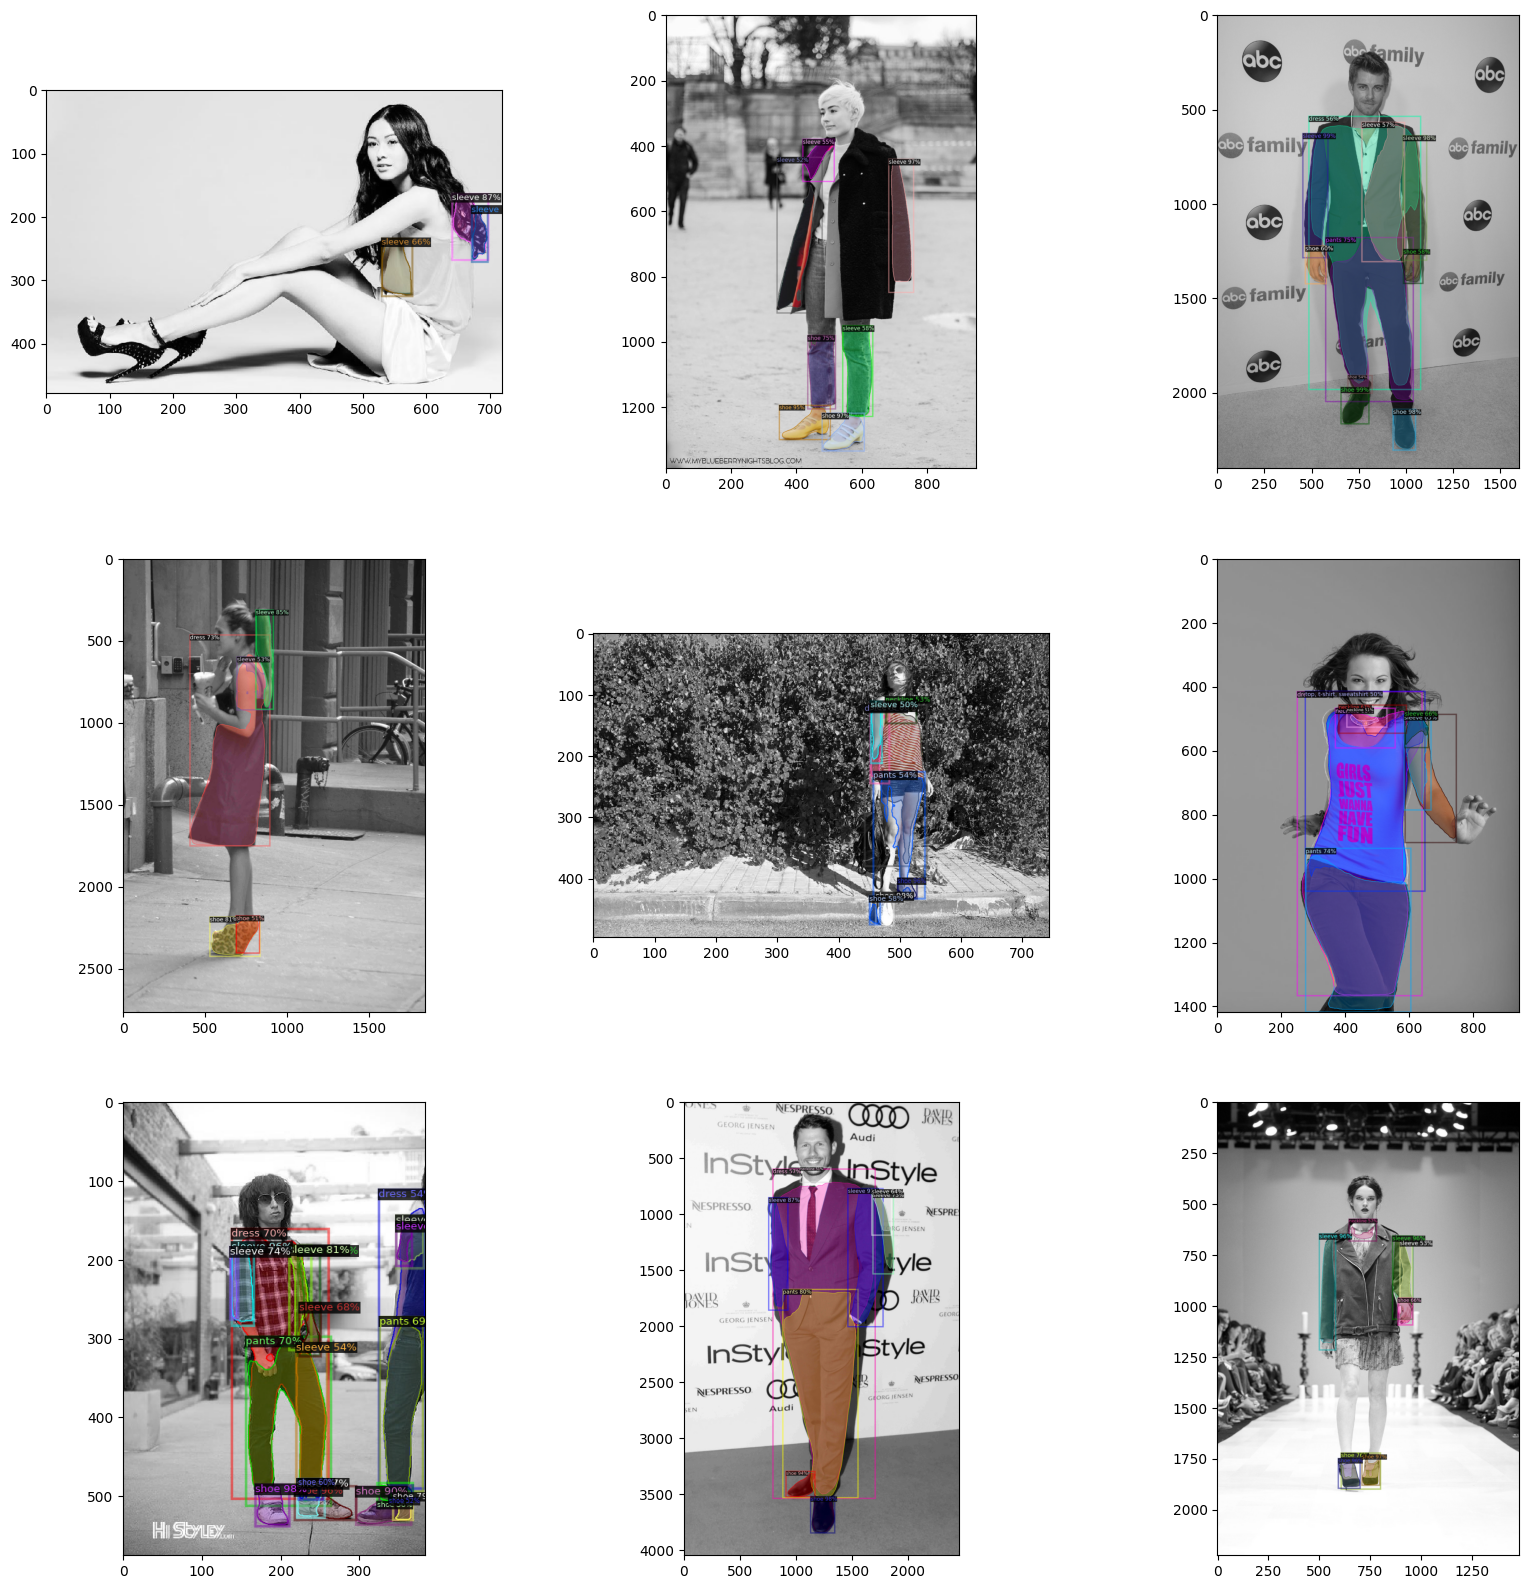

In [35]:
#Show different images at random
rows,cols=3,3
plt.figure(figsize=(20,20))
for i,d in enumerate(random.sample(materialist_dict,9)):
    #Process image
    plt.subplot(rows,cols,i+1)
    im=cv2.imread(d["file_name"])
    im=cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
    #Run through predictor
    outputs=predictor_FPN(im)
    #Visualize
    v=Visualizer(im[:,:,::-1],
                   metadata=materialist_metadata, 
                   scale=0.8, 
                   instance_mode=ColorMode.IMAGE_BW  
    )
    v=v.draw_instance_predictions(outputs["instances"].to("cpu"))
    plt.imshow(v.get_image()[:,:,::-1])
plt.show()

In [37]:
#Evaluate model
evaluator_FPN=COCOEvaluator("mat_val",output_dir="./output")
val_loader_FPN=build_detection_test_loader(cfg_FPN,"mat_val")
#Get results
result_FPN=inference_on_dataset(predictor_FPN.model,val_loader_FPN,evaluator_FPN)

/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.039
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.067
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.044
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.025
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.043
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.041
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.044
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.058
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.058
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.025
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.052
 Average Recall     (AR) @[ IoU=0.50:0.

### RetinaNet on IMaterialist (Fashion)

In [23]:
#Train
os.environ["CUDA_LAUNCH_BLOCKING"]="1"

#Fine-tune a COCO-pretrained RetinaNet model on the dataset
cfg_RetinaNet=get_cfg()
cfg_RetinaNet.merge_from_file(model_zoo.get_config_file("COCO-Detection/retinanet_R_50_FPN_3x.yaml"))
cfg_RetinaNet.DATASETS.TRAIN=("mat_train",)
cfg_RetinaNet.DATASETS.TEST=("mat_val",)
cfg_RetinaNet.DATALOADER.NUM_WORKERS=1
cfg_RetinaNet.MODEL.WEIGHTS=model_zoo.get_checkpoint_url("COCO-Detection/retinanet_R_50_FPN_3x.yaml")
cfg_RetinaNet.SOLVER.IMS_PER_BATCH=2
cfg_RetinaNet.SOLVER.BASE_LR=0.00025
cfg_RetinaNet.SOLVER.MAX_ITER=1000
cfg_RetinaNet.SOLVER.STEPS=[]
cfg_RetinaNet.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE=128
cfg_RetinaNet.MODEL.ROI_HEADS.NUM_CLASSES=46

#Train
cfg_RetinaNet.OUTPUT_DIR="./output_RetinaNet"
os.makedirs(cfg_RetinaNet.OUTPUT_DIR,exist_ok=True)
trainer_RetinaNet=DefaultTrainer(cfg_RetinaNet)
trainer_RetinaNet.resume_or_load(resume=False)
trainer_RetinaNet.train()

0
1000
2000
3000


model_final_5bd44e.pkl: 152MB [00:00, 195MB/s]                             
/opt/conda/lib/python3.10/site-packages/torch/functional.py:513: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at /usr/local/src/pytorch/aten/src/ATen/native/TensorShape.cpp:3609.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


0


/opt/conda/lib/python3.10/site-packages/fvcore/common/checkpoint.py:252: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(f, map_location=torch.device("cpu"))

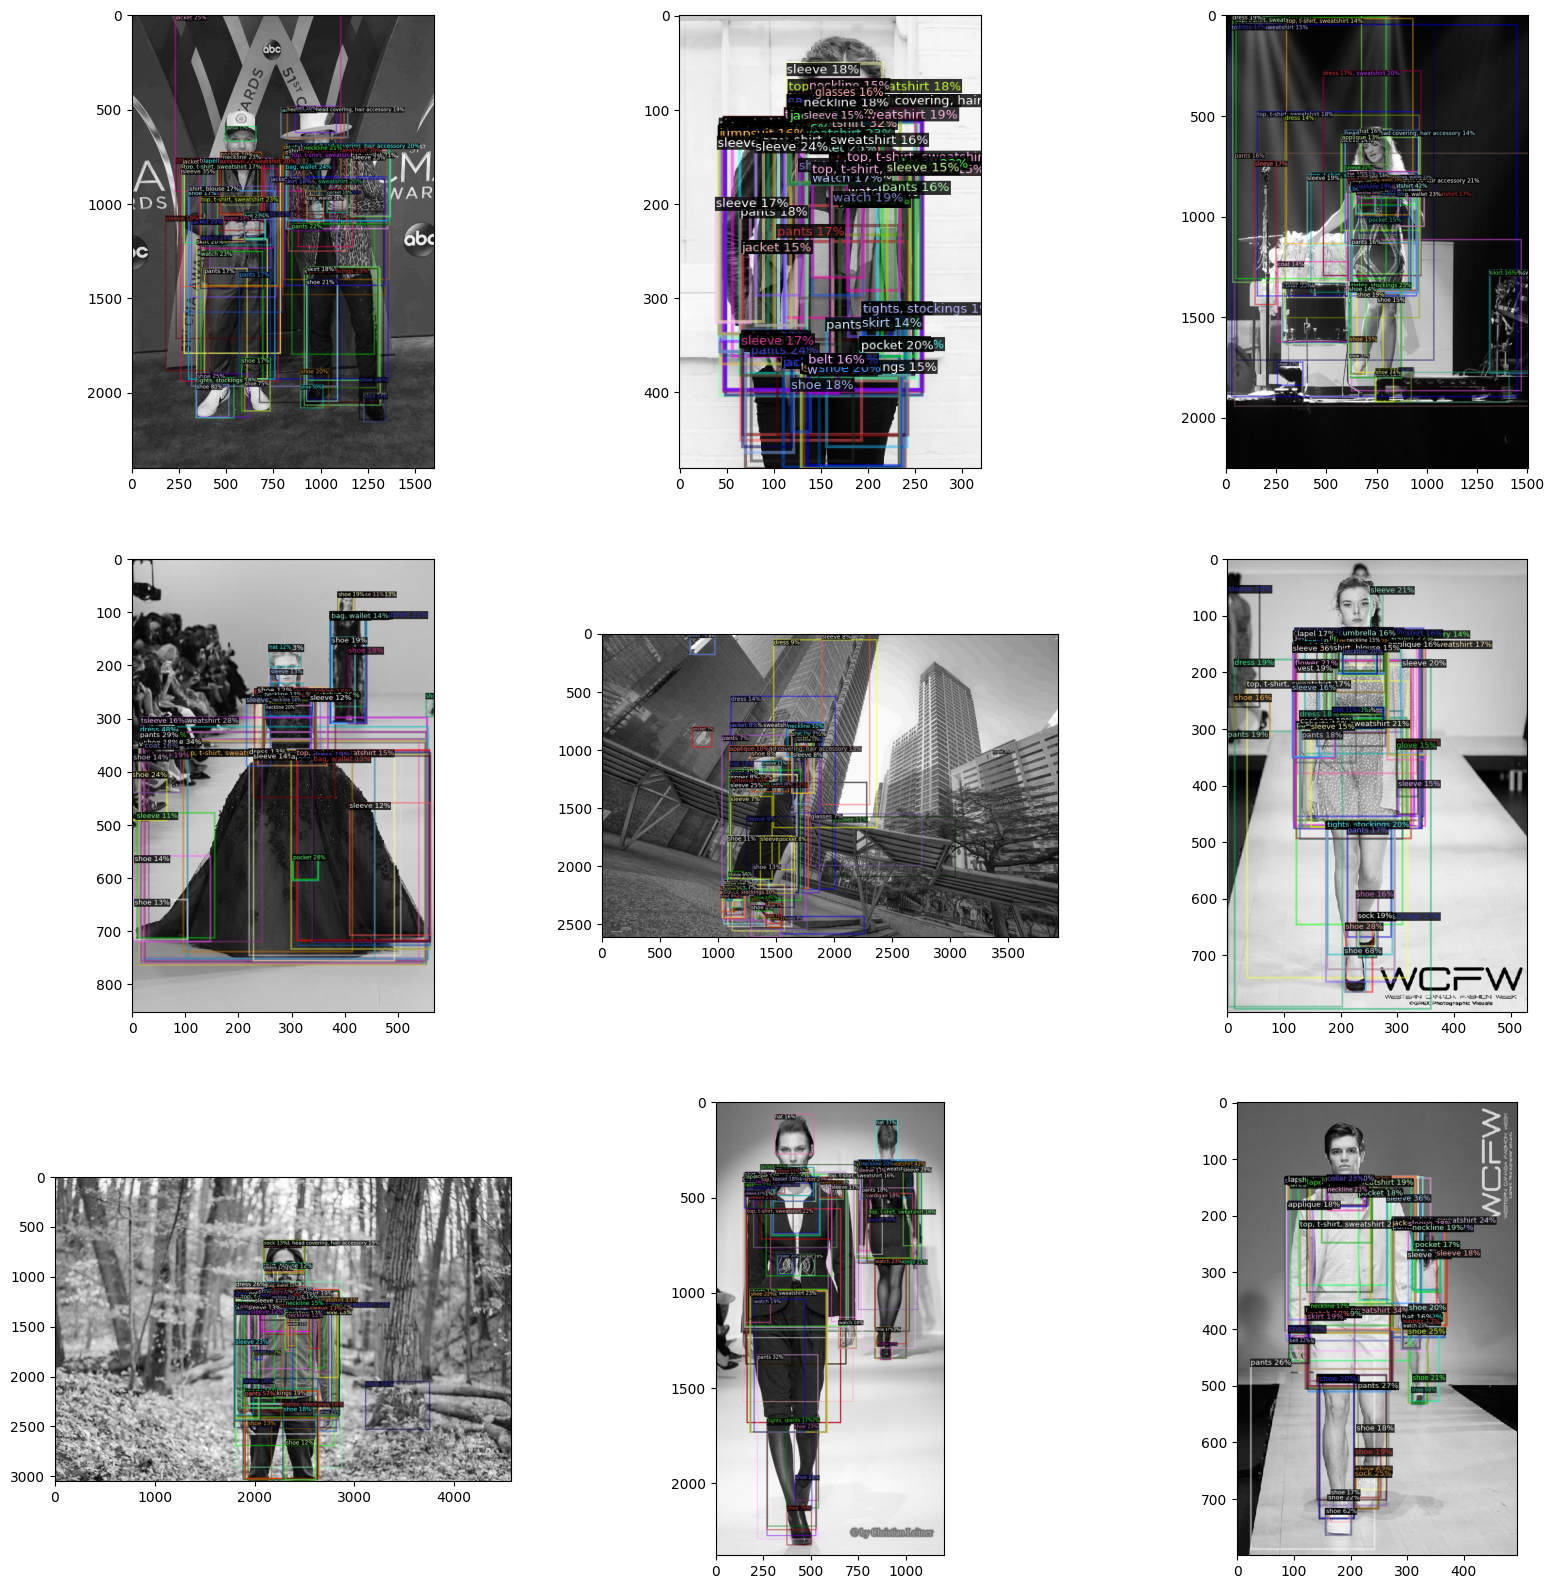

In [27]:
#Testing
cfg_RetinaNet.MODEL.WEIGHTS=os.path.join(cfg_RetinaNet.OUTPUT_DIR,"model_final.pth")
cfg_RetinaNet.MODEL.ROI_HEADS.SCORE_THRESH_TEST=0.5
cfg_RetinaNet.DATASETS.TEST=('mat_val',)
predictor_RetinaNet=DefaultPredictor(cfg_RetinaNet)

#Show different images at random
rows,cols=3,3
plt.figure(figsize=(20,20))
for i,d in enumerate(random.sample(materialist_dict,9)):
    #Process image
    plt.subplot(rows,cols,i+1)
    im=cv2.imread(d["file_name"])
    im=cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
    #Run through predictor
    outputs=predictor_RetinaNet(im)
    #Visualize
    valid_predictions=outputs["instances"][outputs["instances"].pred_classes<46]
    v=Visualizer(im[:,:,::-1],metadata=materialist_metadata,scale=0.8,instance_mode=ColorMode.IMAGE_BW)
    v=v.draw_instance_predictions(valid_predictions.to("cpu"))
    plt.imshow(v.get_image()[:,:,::-1])

plt.show()

In [28]:
#Evaluate model
evaluator_RetinaNet=COCOEvaluator("mat_val",output_dir="./output")
val_loader_RetinaNet=build_detection_test_loader(cfg_RetinaNet,"mat_val")
#Get results
result_RetinaNet=inference_on_dataset(predictor_RetinaNet.model,val_loader_RetinaNet,evaluator_RetinaNet)

0
0


/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Loading and preparing results...
DONE (t=0.03s)
creating index...
index created!
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.092
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.149
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.097
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.130
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.106
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.099
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.260
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.323
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.324
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.137
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.203
 Average Recall     (AR) @[ IoU=0.50:0.